In [1]:
import numpy as np
import pandas as pd
from skimage import io 
import os

Data Loading

In [5]:
files = os.listdir(r'C:\\Users\\user\\OneDrive\\Documents\\cropdisease\\processed_data')

In [6]:
images = []
labels = []
files = os.listdir(r'C:\\Users\\user\\OneDrive\\Documents\\cropdisease\\processed_data')
for pimage in files:
    image = io.imread(f'C:\\Users\\user\\OneDrive\\Documents\\cropdisease\\processed_data\\{pimage}').ravel()/255
    label = int(pimage.split('.')[0][-1])
    images.append(image)
    labels.append(label)


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=1)

In [11]:
xtrain = np.array([image for image in x_train])
ytrain = np.array(y_train)
xtrain[0]

array([0.89411765, 0.89803922, 0.89803922, ..., 0.89019608, 0.89019608,
       0.89019608])

In [13]:
xtest = np.array([image for image in x_test])
ytest = np.array(y_test)
xtest[0]

array([0.90588235, 0.90588235, 0.90588235, ..., 0.91372549, 0.91372549,
       0.91372549])

Modelling

In [14]:
from sklearn.neural_network import MLPClassifier
neural = MLPClassifier(hidden_layer_sizes=(720, 210), activation= 'logistic', verbose=2)
neural.fit(xtrain, ytrain.ravel())

Iteration 1, loss = 1.13266712
Iteration 2, loss = 1.57910493
Iteration 3, loss = 1.41171805
Iteration 4, loss = 1.21635536
Iteration 5, loss = 1.10061774
Iteration 6, loss = 1.14748281
Iteration 7, loss = 1.24228106
Iteration 8, loss = 1.25178883
Iteration 9, loss = 1.19502633
Iteration 10, loss = 1.13062631
Iteration 11, loss = 1.09897406
Iteration 12, loss = 1.10440636
Iteration 13, loss = 1.12842402
Iteration 14, loss = 1.14996191
Iteration 15, loss = 1.15825125
Iteration 16, loss = 1.15029895
Iteration 17, loss = 1.13088958
Iteration 18, loss = 1.11033730
Iteration 19, loss = 1.09689501
Iteration 20, loss = 1.09505237
Iteration 21, loss = 1.10242913
Iteration 22, loss = 1.11315804
Iteration 23, loss = 1.11897737
Iteration 24, loss = 1.11683854
Iteration 25, loss = 1.10865276
Iteration 26, loss = 1.09936491
Iteration 27, loss = 1.09279515
Iteration 28, loss = 1.09312342
Iteration 29, loss = 1.09525936
Iteration 30, loss = 1.10057478
Iteration 31, loss = 1.10193056


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='logistic', hidden_layer_sizes=(720, 210), verbose=2)

In [15]:
ypred = neural.predict(xtest)
ypred == ytest

array([False, False,  True, False,  True, False, False, False, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
       False, False,  True, False, False,  True, False, False,  True,
        True,  True,  True])

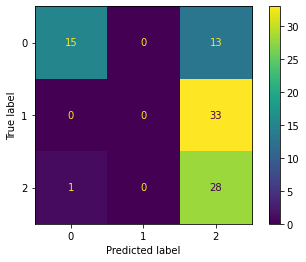

In [16]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(neural, xtrain, ytrain)

In [ ]:
from skimage.feature import hog